# Algorytm Monte Carlo

Przybliżanie wartości liczby pi według algorytmu Monte Carlo dla liczby punktów N = 100, 1000, 10000, 100000

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def generator_punktow(N):
    xn = np.random.rand(N)
    yn = np.random.rand(N)
    f = np.sqrt(1 - xn**2)
    r = yn <= f 
    pi = 4*np.sum(r)/N
    return xn, yn, r, pi

In [3]:
def wykres_punkty(xn, yn, r, N):
    plt.figure(figsize=(5,5))
    plt.scatter(xn[r], yn[r], color='blue', s=1, label='Pod wykresem')
    plt.scatter(xn[~r], yn[~r], color='red', s=1, label='Nad wykresem')

    t = np.linspace(0, 1, 300)
    plt.plot(t, np.sqrt(1 - t**2), 'black', linewidth=1.2, label='Ćwiartka okręgu')

    plt.title(f'Wylosowane punkty dla N = {N}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('square')
    plt.grid(True)
    plt.legend()
    plt.show()

Przybliżenie wartości pi dla N = 100 wynosi 3.32


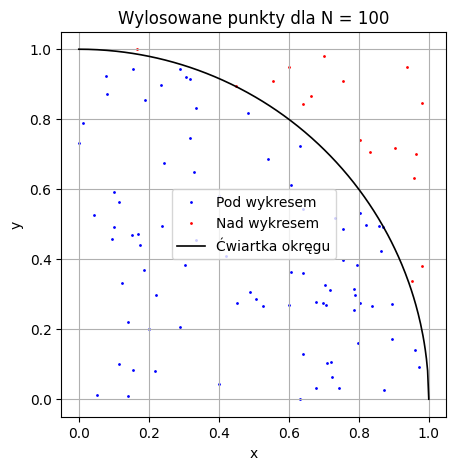

Przybliżenie wartości pi dla N = 1000 wynosi 3.148


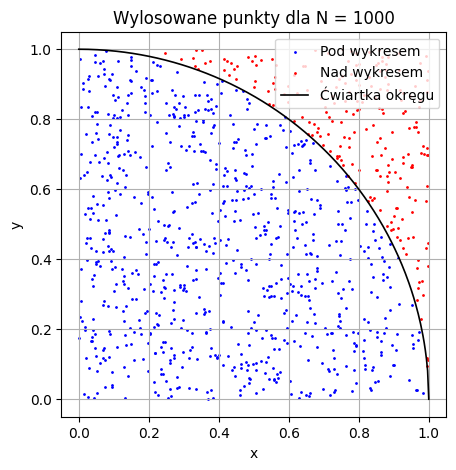

Przybliżenie wartości pi dla N = 10000 wynosi 3.152


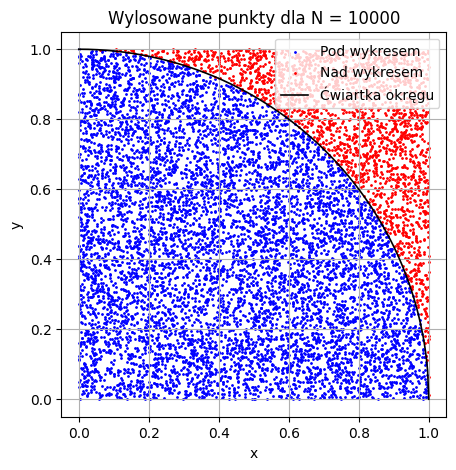

Przybliżenie wartości pi dla N = 100000 wynosi 3.13116


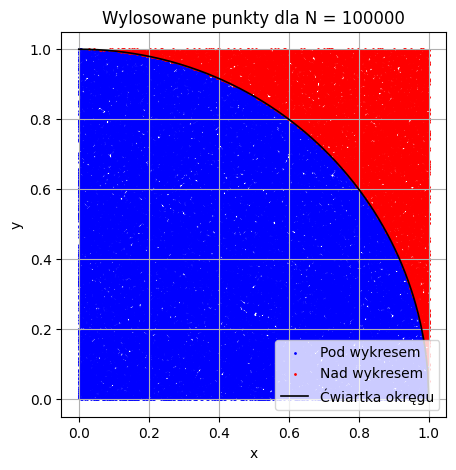

In [4]:
wartosci_N = [100, 1000, 10000, 100000]
for N in wartosci_N:
    x, y, r, pi = generator_punktow(N)
    print(f"Przybliżenie wartości pi dla N = {N} wynosi", pi)
    wykres_punkty(x, y, r, N)

Komentarz:
Dla małych N wartość pi jest niedokładna i losowa. Im większe N, tym wynik bliższy 3.14, a granica ćwiartki lepiej odwzorowana. Więcej punktów = większa dokładność.

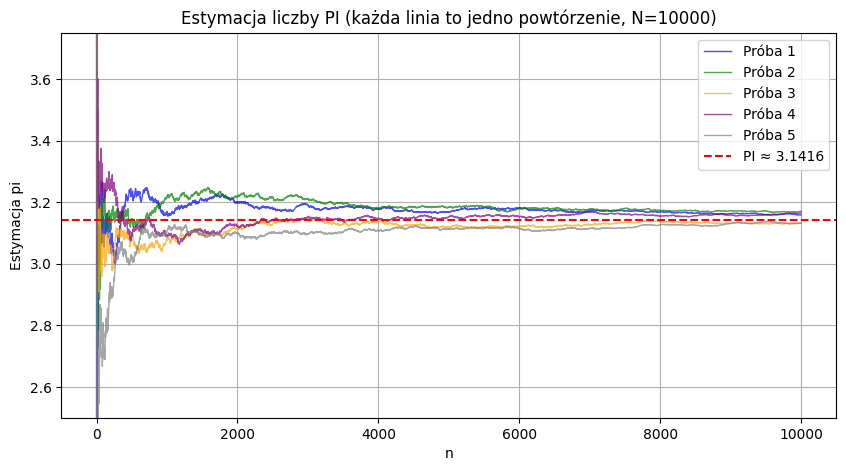

In [5]:
def wykres_dazenia(N, rep=5):
    plt.figure(figsize=(10,5))
    kolory = ['blue', 'green', 'orange', 'purple', 'grey']

    for i in range(rep):
        xn, yn, r, _ = generator_punktow(N)
        estymaty = []
        licznik = 0
        for j in range(1, N + 1):
            if r[j - 1]:
                licznik += 1
            estymaty.append(4 * licznik / j)
        plt.plot(estymaty, color=kolory[i], label=f'Próba {i+1}', linewidth=1, alpha=0.7)

    plt.axhline(np.pi, color='red', linestyle='--', label='PI ≈ 3.1416')
    plt.title(f'Estymacja liczby PI (każda linia to jedno powtórzenie, N={N})')
    plt.xlabel('n')
    plt.ylabel('Estymacja pi')
    plt.ylim(2.5, 3.75)
    plt.grid(True)
    plt.legend()
    plt.show()


wykres_dazenia(10000, 5)

Komentarz:
Na początku duże wahania, ale przy coraz większym N wszystkie próby zbliżają się do wartości pi 3.14. Większa liczba losowań = większa stabilność i dokładność wyniku.

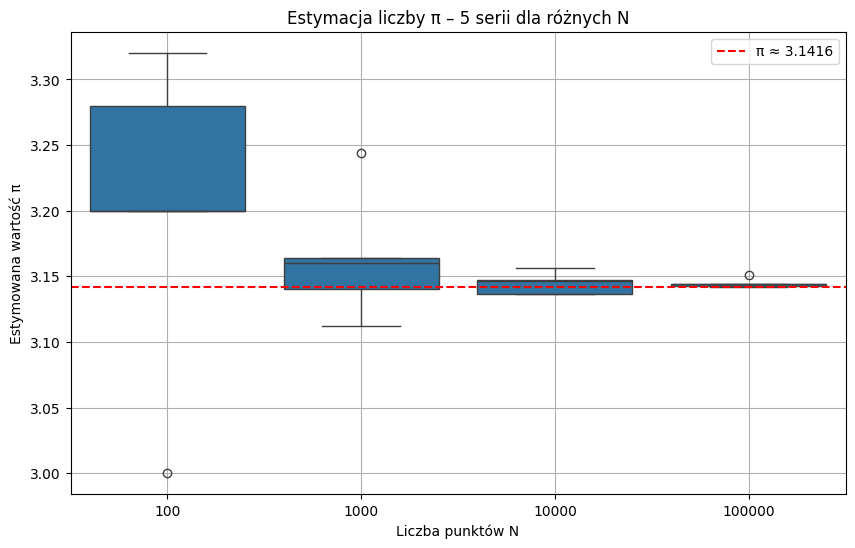

In [6]:
def wykres_pudelkowy(N, rep):
    dane = []

    for wartosc in N:
        for i in range(rep):
            _, _, _, pi = generator_punktow(wartosc)
            dane.append({'N': wartosc, 'pi': pi})

    df = pd.DataFrame(dane)

    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='N', y='pi')
    plt.axhline(np.pi, color='red', linestyle='--', label='π ≈ 3.1416')
    plt.title(f'Estymacja liczby π – {rep} serii dla różnych N')
    plt.xlabel('Liczba punktów N')
    plt.ylabel('Estymowana wartość π')
    plt.grid(True)
    plt.legend()
    plt.show()

wykres_pudelkowy(wartosci_N,5)

Komentarz:
Dla małych N wyniki są rozrzucone i mało dokładne. Przy większych N estymacje pi są coraz bardziej stabilne. Większe N = mniejszy błąd i mniejszy rozrzut.